# Get started with 3D array

Import all modules:

In [1]:
from drp_template.image import save_figure2, plot_slice, plot_histogram
import drp_template.input_output as io
from drp_template.default_params import update_parameters_file
from drp_template.math import get_connected_porosity, get_phase_fractions

Set the file path of your 3D array. For the example you can use a provided 2 phase binary.

In [2]:
file_path = 'data/pore_100_100_400.raw'
raw_file_path = 'data/raw_100cube.raw'

Each 3D.raw must be imported based on it's corresponding parameters like dimensions (nx, ny, nz) or type (uint8, uint16, uint32). The following data (uint8) is sorted in the shape of `data[nz, ny, nx]`. Due to dimensions rules (see README.md) all arrays must be in the format of `data[nx, ny, nz]`. The programm can handle the conversion on its own based on the provided order of dimensions. Regular as well as irregular data can be imported.

In [3]:
dimensions = {'nz': 400, 'ny': 100, 'nx': 100}
dimensions_raw = {'nz': 100, 'ny': 100, 'nx': 100}
data = io.import_model(file_path, dtype='uint8', dimensions=dimensions)
data_raw = io.import_model(raw_file_path, dtype='uint16', dimensions=dimensions_raw)

Parameters filename: pore_100_100_400.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 100
ny: 100
nz: 400
---------------------------------------------------------------------------
data/pore_100_100_400.raw:                                                 
Ups, the minimum value in your data is 1. Automatic adjustments are needed.
---------------------------------------------------------------------------
Parameters filename: raw_100cube.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 100
ny: 100
nz: 100


In case a subvolume is needed, a corresponding `paramsfile` must be prepared which is always created while importing. 

In [4]:
subvolume = data[:, :, :100] # Create a subvolume
subvolume_params = {'dim': 3, 'nx': 100, 'ny': 100, 'nz': 100}
update_parameters_file(paramsfile='subvolume_100_100_100.json', **subvolume_params)

The binaries can also be enriched with labels like pore, matrix, etc.

In [5]:
labels = {0: 'Pore', 1: 'Matrix'} # Define labels
phase_fracs = get_phase_fractions(data, labels=labels)

Phase   Count Fraction   Name
    0  309815   7.7454   Pore
    1 3690185  92.2546 Matrix
    2 4000000    100.0       


The corresponding plots in xy, yz, and xz plane.

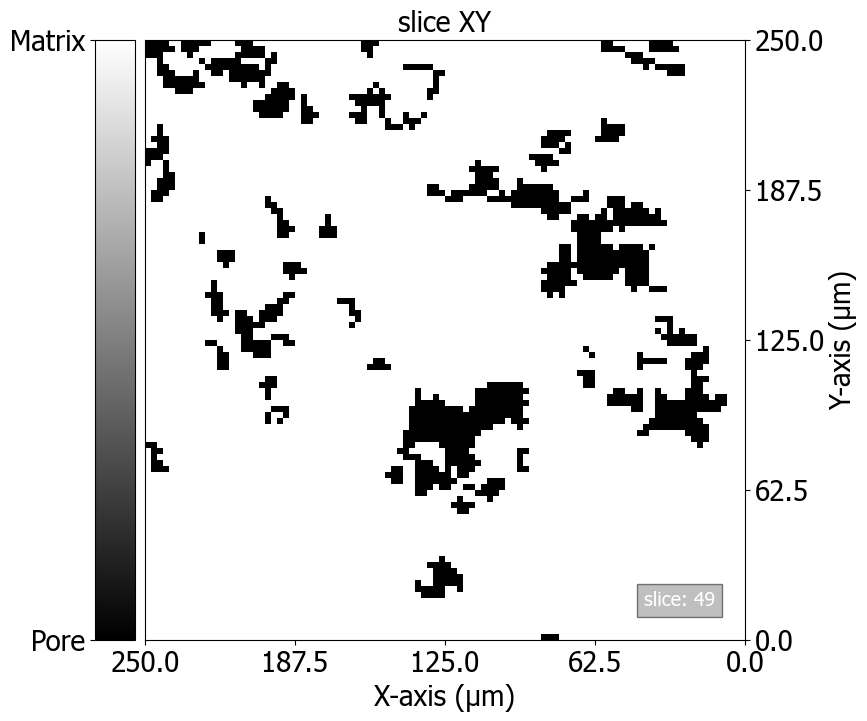

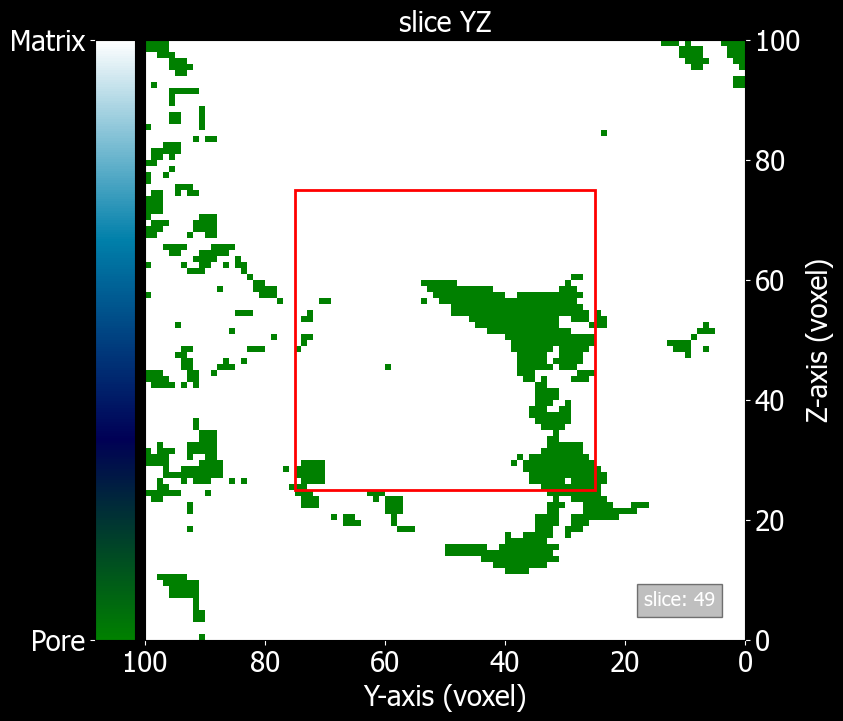

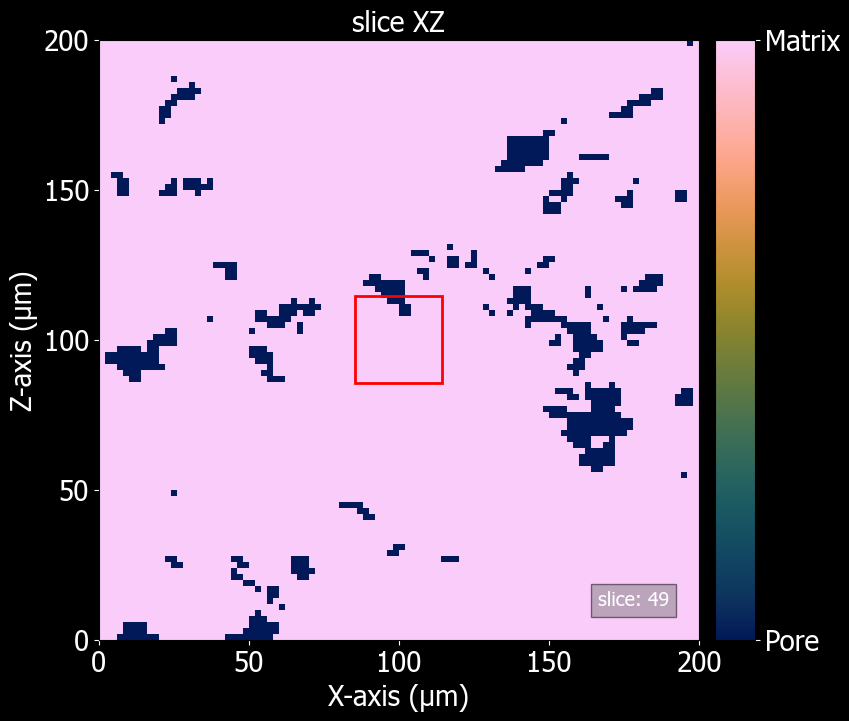

In [6]:
fig_xy, ax = plot_slice(subvolume, paramsfile='subvolume_100_100_100.json', cmap_set="gray", slice=None, plane='xy', subvolume=None, labels=labels, title="slice XY", voxel_size=2.5, dark_mode=False)
fig_yz, ax = plot_slice(subvolume, paramsfile='subvolume_100_100_100.json', cmap_set="ocean", slice=None, plane='yz', subvolume=50, labels=labels, title="slice YZ", voxel_size=None, dark_mode=True)
fig_xz, ax = plot_slice(subvolume, paramsfile='subvolume_100_100_100.json', cmap_set=None, slice=None, plane='xz', subvolume=14.5, labels=labels, title="slice XZ", voxel_size=2, dark_mode=True)

Finally, the figures can be saved in high quality.

In [7]:
save_figure2(fig_xy, filename='subvolume_plane_xy')
save_figure2(fig_yz, filename='subvolume_plane_yz')
save_figure2(fig_xz, filename='subvolume_plane_xz')

Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/output/subvolume_plane_xy.png
Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/output/subvolume_plane_yz.png
Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/output/subvolume_plane_xz.png


Get the connected porosity

Let's plot some histograms.

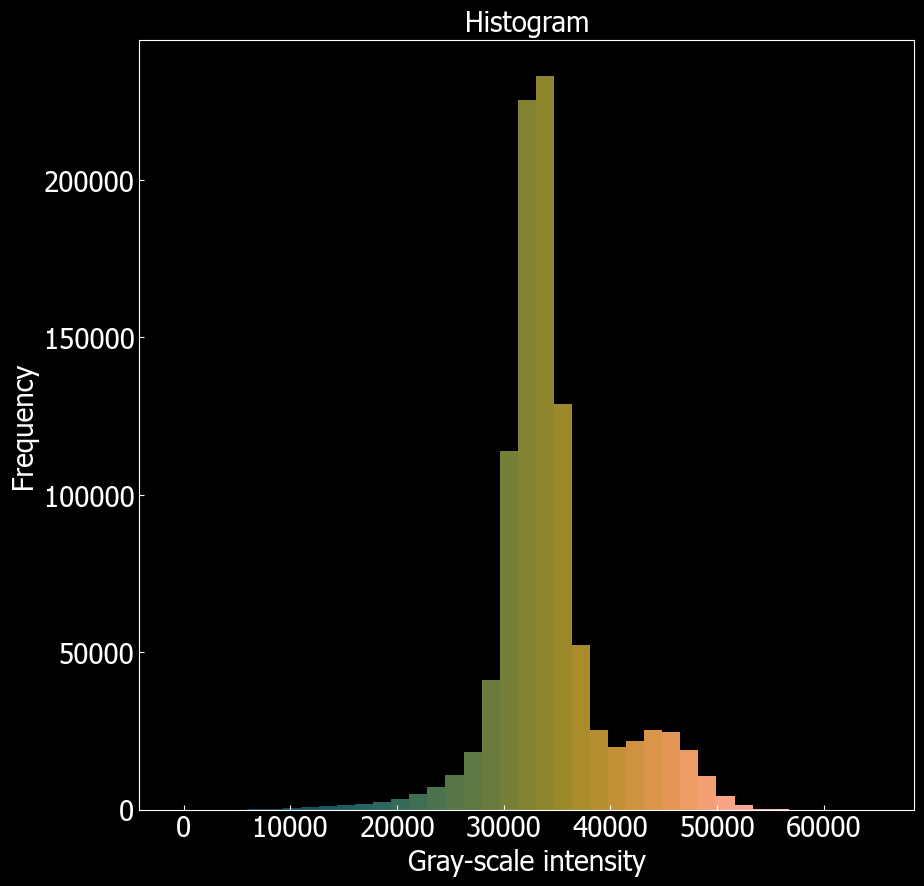

In [20]:
fig_hist = plot_histogram(data_raw, dtype='uint16',cmap_set=None, log_scale=None, dark_mode=True)

In [9]:
output = get_connected_porosity(data, paramsfile='subvolume_100_100_100.json')
con_pore = get_phase_fractions(output)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Phase   Count Fraction
    0 3690185  92.2546
    1       9   0.0002
    2       3   0.0001
    3       8   0.0002
    4      76   0.0019
    5      15   0.0004
    6       1   0.0000
    7   48633   1.2158
    8       1   0.0